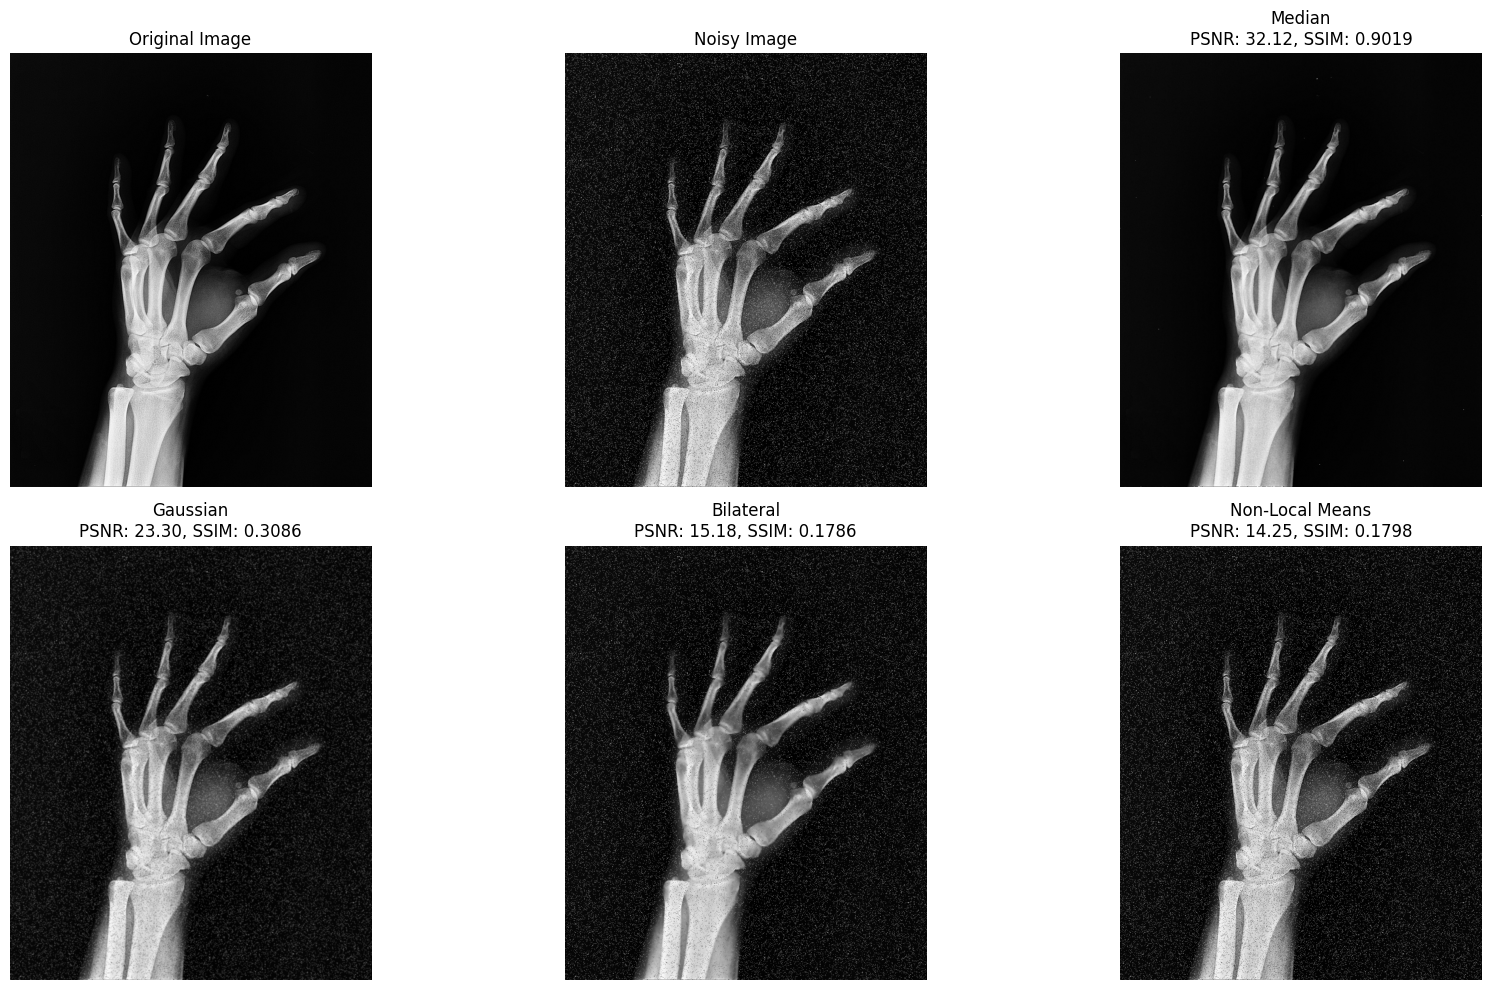

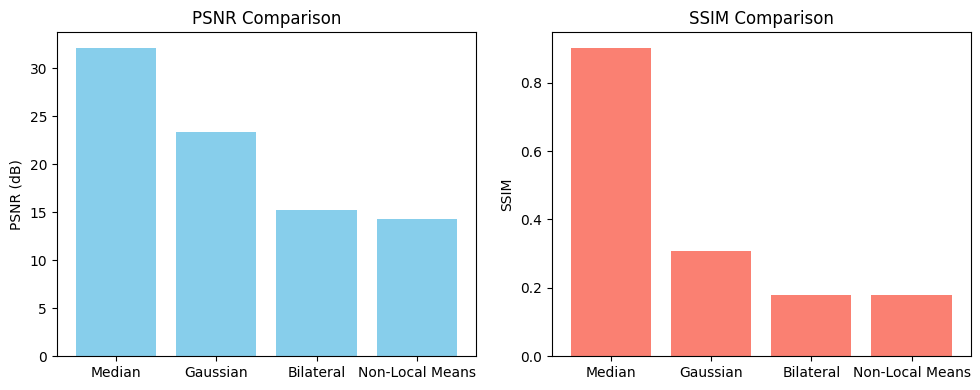

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Load grayscale X-ray image
image = cv2.imread('x-ray2.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Function: Add Salt-and-Pepper Noise
def add_salt_pepper_noise(img, amount=0.09):
    noisy_img = img.copy()
    num_salt = int(amount * img.size * 0.5)
    num_pepper = int(amount * img.size * 0.5)

    # Salt
    coords = [np.random.randint(0, i, num_salt) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 255

    # Pepper
    coords = [np.random.randint(0, i, num_pepper) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 0

    return noisy_img

# Add noise
noisy_image = add_salt_pepper_noise(image)

# Apply different denoising filters
restored_median = cv2.medianBlur(noisy_image, 3)
restored_gaussian = cv2.GaussianBlur(noisy_image, (5,5), 0)
restored_bilateral = cv2.bilateralFilter(noisy_image, d=9, sigmaColor=75, sigmaSpace=75)
restored_nlmeans = cv2.fastNlMeansDenoising(noisy_image, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Store results
methods = ['Median', 'Gaussian', 'Bilateral', 'Non-Local Means']
restored_images = [restored_median, restored_gaussian, restored_bilateral, restored_nlmeans]

# Calculate PSNR/SSIM
psnr_vals = [psnr(image, r) for r in restored_images]
ssim_vals = [ssim(image, r) for r in restored_images]

# --- Plot original + noisy + 4 restorations ---
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

for i, (restored, method) in enumerate(zip(restored_images, methods)):
    plt.subplot(2, 3, i+3)
    plt.imshow(restored, cmap='gray')
    plt.title(f"{method}\nPSNR: {psnr_vals[i]:.2f}, SSIM: {ssim_vals[i]:.4f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- Plot PSNR and SSIM bar graphs ---
x = np.arange(len(methods))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(x, psnr_vals, color='skyblue')
plt.xticks(x, methods)
plt.title("PSNR Comparison")
plt.ylabel("PSNR (dB)")

plt.subplot(1,2,2)
plt.bar(x, ssim_vals, color='salmon')
plt.xticks(x, methods)
plt.title("SSIM Comparison")
plt.ylabel("SSIM")

plt.tight_layout()
plt.show()
